In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
import operator

In [51]:
data1 = pd.read_csv('train_final.csv')
data2=pd.read_csv('test_final.csv')
data1.head()

,id,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,1,student,spend>saving,6,40,13.62,3.2804,C1
1,2,student,spend>saving,11,21,15.32,2.0232,C1
2,3,student,spend>saving,7,64,16.55,3.1202,C1
3,4,student,spend>saving,3,47,15.71,3.4022,C1
4,5,student,spend>saving,15,10,16.96,2.2825,C1


In [52]:
data1_numeric=data1[['Vacation','eCredit','salary','property']]
data1_numeric.head()

,Vacation,eCredit,salary,property
0,6,40,13.62,3.2804
1,11,21,15.32,2.0232
2,7,64,16.55,3.1202
3,3,47,15.71,3.4022
4,15,10,16.96,2.2825


In [53]:
data2_numeric=data2[['Vacation','eCredit','salary','property']]
data2_numeric.head()

,Vacation,eCredit,salary,property
0,12,19,14.7900,3.7697
1,29,10,16.1900,2.4839
2,28,60,15.4600,1.1885
3,15,41,21.2600,1.4379
4,2,9,19.7207,0.6913


In [54]:
data1_norm = (data1_numeric-data1_numeric.min())/(data1_numeric.max()-data1_numeric.min())
data1_norm.head()

,Vacation,eCredit,salary,property
0,0.079365,0.107558,0.219960,0.183167
1,0.158730,0.052326,0.293102,0.112797
2,0.095238,0.177326,0.346023,0.174200
3,0.031746,0.127907,0.309882,0.189984
4,0.222222,0.020349,0.363663,0.127311


In [55]:
data2_norm = (data2_numeric-data2_numeric.min())/(data2_numeric.max()-data2_numeric.min())
data2_norm.head()

,Vacation,eCredit,salary,property
0,0.20,0.058824,0.104637,0.398926
1,0.54,0.021008,0.175059,0.243041
2,0.52,0.231092,0.138339,0.085992
3,0.26,0.151261,0.430086,0.116229
4,0.00,0.016807,0.352657,0.025714


In [56]:
data1=data1.drop(['Vacation','eCredit','salary','property'],axis=1)
data1.head()

,id,Type,LifeStyle,label
0,1,student,spend>saving,C1
1,2,student,spend>saving,C1
2,3,student,spend>saving,C1
3,4,student,spend>saving,C1
4,5,student,spend>saving,C1


In [57]:
data2=data2.drop(['Vacation','eCredit','salary','property'],axis=1)
data2.head()

,id,Type,LifeStyle,label
0,1,student,spend<saving,C1
1,2,student,spend>>saving,C1
2,3,student,spend<<saving,C1
3,4,engineer,spend>saving,C1
4,5,librarian,spend<saving,C1


In [58]:
data1_label=data1[['label']]
data1_label.head()

,label
0,C1
1,C1
2,C1
3,C1
4,C1


In [59]:
data2_label=data2[['label']]
data2_label.head()

,label
0,C1
1,C1
2,C1
3,C1
4,C1


In [60]:
data1=data1.drop(['label'],axis=1)
data1.head()

,id,Type,LifeStyle
0,1,student,spend>saving
1,2,student,spend>saving
2,3,student,spend>saving
3,4,student,spend>saving
4,5,student,spend>saving


In [61]:
data2=data2.drop(['label'],axis=1)
data2.head()

,id,Type,LifeStyle
0,1,student,spend<saving
1,2,student,spend>>saving
2,3,student,spend<<saving
3,4,engineer,spend>saving
4,5,librarian,spend<saving


In [62]:
xtrain = pd.concat([data1, data1_norm,data1_label], axis=1, sort=False)
xtrain.head()

,id,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,1,student,spend>saving,0.079365,0.107558,0.219960,0.183167,C1
1,2,student,spend>saving,0.158730,0.052326,0.293102,0.112797,C1
2,3,student,spend>saving,0.095238,0.177326,0.346023,0.174200,C1
3,4,student,spend>saving,0.031746,0.127907,0.309882,0.189984,C1
4,5,student,spend>saving,0.222222,0.020349,0.363663,0.127311,C1


In [63]:
xtest = pd.concat([data2, data2_norm,data2_label], axis=1, sort=False)
xtest.head()

,id,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,1,student,spend<saving,0.20,0.058824,0.104637,0.398926,C1
1,2,student,spend>>saving,0.54,0.021008,0.175059,0.243041,C1
2,3,student,spend<<saving,0.52,0.231092,0.138339,0.085992,C1
3,4,engineer,spend>saving,0.26,0.151261,0.430086,0.116229,C1
4,5,librarian,spend<saving,0.00,0.016807,0.352657,0.025714,C1


In [64]:
xtest.head()

,id,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,1,student,spend<saving,0.20,0.058824,0.104637,0.398926,C1
1,2,student,spend>>saving,0.54,0.021008,0.175059,0.243041,C1
2,3,student,spend<<saving,0.52,0.231092,0.138339,0.085992,C1
3,4,engineer,spend>saving,0.26,0.151261,0.430086,0.116229,C1
4,5,librarian,spend<saving,0.00,0.016807,0.352657,0.025714,C1


In [65]:
k_list=[]
acc_list=[]
for k in range(1,26,2):
    k_list.append(k)
    predict=[]
    def euc_distance(testrow,trainrow,length):
        distance=0
        for i in range(1,3):
            if(testrow[i]==trainrow[i]):
                distance+=1
#         for i in range(2):
#             if(testrow[i]==trainrow[i]):
#                 distance+=1
        for i in range(3,length-1):
            distance+=pow((testrow[i]-trainrow[i]),2)
        return math.sqrt(distance)
    def getNeighbours(traindata,testRow,k):
        distance_with_train=[]
        length=len(testRow)
        for x in range(len(traindata)):
            dist=euc_distance(testRow,traindata[x],length)
            distance_with_train.append((traindata[x],dist))
        distance_with_train.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(k):
            neighbors.append(distance_with_train[x][0])
        return neighbors
    def getResponse(neighbors):
        votes = {}
        for x in range(len(neighbors)):
            response = neighbors[x][-1]
            if response in votes:
                votes[response] += 1
            else:
                votes[response] = 1
#         print(votes,"votes")
        sortedVotes = sorted(votes.items(), key=operator.itemgetter(1), reverse=True)
        #print(sortedVotes[0][0])
        return sortedVotes[0][0]
    def getAccuracy(xtest, predict):
        correct = 0
        for x in range(len(xtest)):
            if xtest[x][-1] == predict[x]:
                correct += 1
        return (correct/float(len(xtest))) * 100.0
    for i in range(len(xtest)):
        neighbour=getNeighbours(xtrain.values,xtest.values[i],k)
    #     print(neighbour)
        result = getResponse(neighbour)
        predict.append(result)
#         print('> predicted=' + repr(result) + ', actual=' + repr(xtest.values[i][-1]))
    accuracy = getAccuracy(xtest.values, predict)
    acc_list.append(accuracy)
    print('Accuracy: ' + repr(accuracy) + '%','with k=',k)

Accuracy: 19.047619047619047% with k= 1
Accuracy: 23.809523809523807% with k= 3
Accuracy: 19.047619047619047% with k= 5
Accuracy: 14.285714285714285% with k= 7
Accuracy: 19.047619047619047% with k= 9
Accuracy: 19.047619047619047% with k= 11
Accuracy: 23.809523809523807% with k= 13
Accuracy: 23.809523809523807% with k= 15
Accuracy: 28.57142857142857% with k= 17
Accuracy: 28.57142857142857% with k= 19
Accuracy: 28.57142857142857% with k= 21
Accuracy: 28.57142857142857% with k= 23
Accuracy: 28.57142857142857% with k= 25


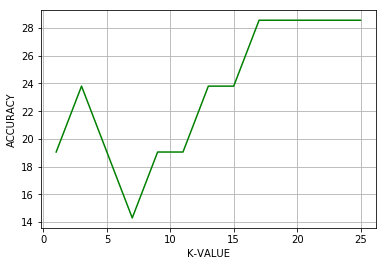

In [66]:
plt.plot(k_list,acc_list,color='green')
plt.xlabel('K-VALUE')
plt.ylabel('ACCURACY')
plt.grid(True)
plt.show()